** Ejercicio 1 **

- Carga en un DataFrame este dataset: https://archive.ics.uci.edu/ml/datasets/Automobile 

In [76]:
import pandas as pd

cols = ["symboling", "normalized-losses", "make", "fuel-type",  "aspiration",
        "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
        "length", "width", "height","curb-weight", "engine-type", "num-of-cylinders",
        "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",                
        "peak-rpm", "city-mpg", "highway-mpg",  "price"]

#En imports-85.names indica: Missing Attribute Values: (denoted by "?")
autosdf = pd.read_csv("autos/imports-85.data", sep=',', names=cols, na_values=["?"])
#autosdf.columns = cols

print(autosdf.shape)
autosdf.head()

#http://stackoverflow.com/questions/29247712/pandas-how-to-replace-with-nan-handling-non-standard-missing-values

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


- Comprueba si tiene datos faltantes y trátalos de la manera que creas más conveniente.

In [30]:
#Existen 59 datos faltantes, repartidos en 46 filas
#Se mantiene el df original y, en función de los cálculos a realizar se suprimirán los NaN

count_nan = len(autosdf) - autosdf.count()
print("Missing values: ", sum(count_nan))
print("Rows with missing values: ", autosdf.shape[0] - autosdf.dropna().shape[0])

Missing values:  59
Rows with missing values:  46


- Obtén la longitud y anchuras medias por cada categoría (“body-style”).

In [40]:
#Selección de las columnas con las que trabajar y descarte de NaN
bodyStyleDf = autosdf[["body-style", "length", "width"]]
bodyStyleDf = bodyStyleDf.dropna()
#bodyStyleDf.head()

bodyStyleDf.groupby(["body-style"]).mean()

#http://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average

,length,width
body-style,,
convertible,170.383333,65.583333
hardtop,176.937500,66.612500
hatchback,166.592857,65.247143
sedan,177.585417,66.260417
wagon,181.304000,66.256000


- Analiza el atributo peso (“curb-weight”) y dibuja su histograma para apreciar si sigue alguna distribución concreta.

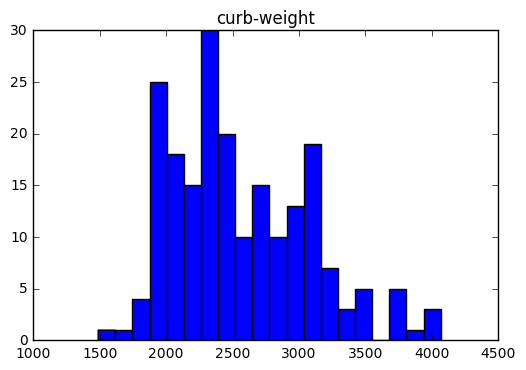

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

#Selección de las columnas con las que trabajar y descarte de NaN
curbWeightDf = autosdf[["curb-weight"]]
curbWeightDf = curbWeightDf.dropna()
#curbWeightDf.head()

_ = plt.hist(curbWeightDf.values, label="curb-weight", bins=20)
plt.title("curb-weight")
#curbWeightDf.hist(bins=20)

#Se asemeja a una distribución normal, desplazada hacia la izquierda (skew)

#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
#https://en.wikipedia.org/wiki/Skew_normal_distribution

- Analiza cuál es el número de cilindros que se da con más frecuencia en el dataset.
- Obtén una lista ordenada de las diferentes marcas de coches.

In [113]:
import numpy as np

#Se obtiene la columna y se descartan los NaN
numCylDf = autosdf[["num-of-cylinders"]]
numCylDf = numCylDf.dropna()

#Cuatro cilindros, con 159 muestras es la más frecuente
print(numCylDf['num-of-cylinders'].value_counts())
#http://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

#Se obtiene la columna y se descartan los NaN
makeDf = autosdf[["make"]]
makeDf = makeDf.dropna()

#Se obtiene un array con las únicas marcas
uniqueMakes = makeDf["make"].unique()
#print(type(uniqueMakes))

#Se ordenan alfabéticamente
print(np.sort(uniqueMakes))

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html

<class 'pandas.core.frame.DataFrame'>
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


** Ejercicio 2 **
- Carga en un DataFrame este dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income


In [107]:
import numpy as np
import pandas as pd

adultcols = ["age", "workclass", "fnlwgt", "education",  "education-num",
        "marital-status", "occupation", "relationship", "race", "sex",
        "capital-gain", "capital-loss", "hours-per-week","native-country", "income"]

#En este caso, las variables van separadas por una coma y hay un espacio detrás (na_values!!)
adultsdf = pd.read_csv("adult/adult.data", sep=',', names=adultcols, na_values=["?"], skipinitialspace=True)

adultsdf['low_income'] = np.where(adultsdf["income"] == "<=50K", 1, 0)
adultsdf['high_income'] = np.where(adultsdf["income"] == ">50K", 1, 0)

print(adultsdf.shape)
adultsdf.head(10)

#http://stackoverflow.com/questions/10715519/conditionally-fill-column-values-based-on-another-columns-value-in-pandas

(32561, 17)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,low_income,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0,1


- Estudia si hay variables como el nivel educativo o el país que influyen en que se tuviese un salario mayor o menor de 50K. Puedes simplemente obtener la cuenta de las veces que sucede una u otra cosa de los diferentes grupos.

In [114]:
#TODO - REVISAR

nativeCountryDf = adultsdf[["native-country", "income", "low_income"]]
nativeCountryDf = nativeCountryDf.dropna()

#Con esto se obtiene la cuenta total de items por país, pero hay que diferenciar
nativeCountryDf.groupby(["native-country", "income"]).agg(['count'])

#byNatCountry = nativeCountryDf.groupby("native-country")
#byNatCountry.boxplot(column="income")

low_income
                                       count
native-country             income           
Cambodia                   <=50K          12
                           >50K            7
Canada                     <=50K          82
                           >50K           39
China                      <=50K          55
                           >50K           20
Columbia                   <=50K          57
                           >50K            2
Cuba                       <=50K          70
                           >50K           25
Dominican-Republic         <=50K          68
                           >50K            2
Ecuador                    <=50K          24
                           >50K            4
El-Salvador                <=50K          97
                           >50K            9
England                    <=50K          60
                           >50K           30
France                     <=50K          17
                           >50K           12
Germany                    <=50K          93
                           >50K           44
Greece                     <=50K          21
                           >50K            8
Guatemala                  <=50K          61
                           >50K            3
Haiti                      <=50K          40
                           >50K            4
Holand-Netherlands         <=50K           1
Honduras                   <=50K          12
...                                      ...
Mexico                     >50K           33
Nicaragua                  <=50K          32
                           >50K            2
Outlying-US(Guam-USVI-etc) <=50K          14
Peru                       <=50K          29
                           >50K            2
Philippines                <=50K         137
                           >50K           61
Poland                     <=50K          48
                           >50K           12
Portugal                   <=50K          33
                           >50K            4
Puerto-Rico                <=50K         102
                           >50K           12
Scotland                   <=50K           9
                           >50K            3
South                      <=50K          64
                           >50K           16
Taiwan                     <=50K          31
                           >50K           20
Thailand                   <=50K          15
                           >50K            3
Trinadad&Tobago            <=50K          17
                           >50K            2
United-States              <=50K       21999
                           >50K         7171
Vietnam                    <=50K          62
                           >50K            5
Yugoslavia                 <=50K          10
                           >50K            6

[80 rows x 1 columns]